>**Load the libraries, mount drive and load data**

In [151]:
!pip install kmodes
!pip install xgboost
!pip install lightgbm
!pip install mlxtend
!pip install Boruta
%pip install mlxtend --upgrade
#################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os
import warnings
from kmodes.kmodes import KModes
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
from scipy.stats.stats import kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression #linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif as MIC
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.datasets import make_blobs
import scipy.stats as stats
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
%matplotlib inline
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
from google.colab import drive
drive.mount('/content/drive')
non_genetic_data=pd.read_csv("/content/drive/MyDrive/d2k/tarrc_nongenomic.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
list(non_genetic_data.columns)

['STUDYID',
 'PATID',
 'VISIT',
 'MISC_TARC_PAT_VISIT',
 'CCR',
 'CCR_YES',
 'CCR_CL_IMPRESS_CODE',
 'CCR_MCIAMEM',
 'CCR_MCIAPLUS',
 'CCR_MCIAPLAN',
 'CCR_MCIAPATT',
 'CCR_MCIAPEX',
 'CCR_MCIAPVIS',
 'CCR_MCINON1',
 'CCR_MCIN1LAN',
 'CCR_MCIN1ATT',
 'CCR_MCIN1EX',
 'CCR_MCIN1VIS',
 'CCR_MCINON2',
 'CCR_MCIN2LAN',
 'CCR_MCIN2ATT',
 'CCR_MCIN2EX',
 'CCR_MCIN2VIS',
 'CCR_YES_NOTES',
 'MISC_SITEID',
 'A1_BIRTHYR',
 'AGE',
 'A1_EVENTDATEX',
 'A1_HANDEDNESS',
 'A1_HISPANIC',
 'A1_HISPANIC_TYPE',
 'A1_HISPORX',
 'A1_MARISTAT',
 'A1_RACE',
 'A1_RACESEC',
 'A1_RESIDENC',
 'A1_SEX',
 'A3_DADDEM',
 'A3_MOMDEM',
 'A41_PMA',
 'A41_PMAF',
 'A41_PMAFU',
 'A41_PMAP',
 'A41_PMAPF',
 'A41_PMAPFU',
 'A41_PMAPREV',
 'A41_PMART',
 'A41_PMAS',
 'A41_PMASTDA',
 'A41_PMASTMO',
 'A41_PMASTYR',
 'A41_PMASU',
 'A41_PMB',
 'A41_PMBF',
 'A41_PMBFU',
 'A41_PMBP',
 'A41_PMBPF',
 'A41_PMBPFU',
 'A41_PMBPREV',
 'A41_PMBRT',
 'A41_PMBS',
 'A41_PMBSTDA',
 'A41_PMBSTMO',
 'A41_PMBSTYR',
 'A41_PMBSU',
 'A42_VEA',
 'A42_V

> **DATA PREPROCESSING** *for physical and mental ailment data*

> **DATA CLEANING FUNCTION BLOCK**

In [154]:
def preprocessing(df):
  df2=df.drop(['STUDYID','PATID','VISIT','MISC_TARC_PAT_VISIT','CCR','CCR_YES','CCR_CL_IMPRESS_CODE','CCR_MCIAMEM','CCR_MCIAPLUS','CCR_MCIAPLAN','CCR_MCIAPATT','CCR_MCIAPEX',
               'CCR_MCIAPVIS','CCR_MCINON1','CCR_MCIN1LAN','CCR_MCIN1ATT','CCR_MCIN1EX','CCR_MCIN1VIS','CCR_MCINON2','CCR_MCIN2LAN','CCR_MCIN2ATT','CCR_MCIN2EX','CCR_MCIN2VIS',
               'CCR_YES_NOTES','MISC_SITEID','A1_BIRTHYR','A1_EVENTDATEX','A1_HANDEDNESS','A1_HISPANIC','A1_HISPANIC_TYPE','A1_HISPORX','A1_MARISTAT','A1_RACE','A1_RACESEC',
               'A1_RESIDENC','A41_PMA','A41_PMAF','A41_PMAFU','A41_PMAP','A41_PMAPF','A41_PMAPFU','A41_PMAPREV','A41_PMART','A41_PMAS','A41_PMASTDA','A41_PMASTMO','A41_PMASTYR',
               'A41_PMASU','A41_PMB','A41_PMBF','A41_PMBFU','A41_PMBP','A41_PMBPF','A41_PMBPFU','A41_PMBPREV','A41_PMBRT','A41_PMBS','A41_PMBSTDA','A41_PMBSTMO','A41_PMBSTYR',
               'A41_PMBSU','A42_VEA','A42_VEAF','A42_VEAFU','A42_VEAPREV','A42_VEART','A42_VEAS','A42_VEASU','A43_ADA','A43_ADACONT','A43_ADAENDDA','A43_ADAENDMO','A43_ADAENDYR',
               'A43_ADAF','A43_ADAFU','A43_ADAPREV','A43_ADART','A43_ADAS','A43_ADASTDA','A43_ADASTMO','A43_ADASTYR','A43_ADASU','A43_ADB','A43_ADBCONT','A43_ADBENDDA','A43_ADBENDMO',
               'A43_ADBENDYR','A43_ADBF','A43_ADBFU','A43_ADBPREV','A43_ADBRT','A43_ADBS','A43_ADBSTDA','A43_ADBSTMO','A43_ADBSTYR','A43_ADBSU','A43_ADC','A43_ADCCONT','A43_ADCENDDA',
               'A43_ADCENDMO','A43_ADCENDYR','A43_ADCF','A43_ADCFU','A43_ADCPREV','A43_ADCRT','A43_ADCS','A43_ADCSTDA','A43_ADCSTMO','A43_ADCSTYR','A43_ADCSU','A43_ADD','A43_ADDCONT',
               'A43_ADDENDDA','A43_ADDENDMO','A43_ADDENDYR','A43_ADDF','A43_ADDFU','A43_ADDPREV','A43_ADDRT','A43_ADDS','A43_ADDSTDA','A43_ADDSTMO','A43_ADDSTYR','A43_ADDSU','A43_ADE','A43_ADECONT',
               'A43_ADEENDDA','A43_ADEENDMO','A43_ADEENDYR','A43_ADEF','A43_ADEFU','A43_ADEPREV','A43_ADERT','A43_ADES','A43_ADESTDA','A43_ADESTMO','A43_ADESTYR','A43_ADESU','A43_ADF',
               'A43_ADFCONT','A43_ADFENDDA','A43_ADFENDMO','A43_ADFENDYR','A43_ADFF','A43_ADFFU','A43_ADFPREV','A43_ADFRT','A43_ADFS','A43_ADFSTDA','A43_ADFSTMO','A43_ADFSTYR','A43_ADFSU',
               'A43_ADMEDEVER','A44_DRG_TRIAL','A44_DRG_TRIALX','A44_SSA','A44_SSAF','A44_SSAFU','A44_SSAPREV','A44_SSART','A44_SSAS','A44_SSASTDA','A44_SSASTMO','A44_SSASTYR','A44_SSASU',
               'A44_SSB','A44_SSBF','A44_SSBFU','A44_SSBPREV','A44_SSBRT','A44_SSBS','A44_SSBSTDA','A44_SSBSTMO','A44_SSBSTYR','A44_SSBSU','A44_SSC','A44_SSCF','A44_SSCFU',
               'A44_SSCPREV','A44_SSCRT','A44_SSCS','A44_SSCSTDA','A44_SSCSTMO','A44_SSCSTYR','A44_SSCSU','A44_SSD','A44_SSDF','A44_SSDFU','A44_SSDPREV','A44_SSDRT',
               'A44_SSDS','A44_SSDSTDA','A44_SSDSTMO','A44_SSDSTYR','A44_SSDSU','A44_SSE','A44_SSEF','A44_SSEFU','A44_SSEPREV','A44_SSERT','A44_SSES','A44_SSESTDA','A44_SSESTMO',
               'A44_SSESTYR','A44_SSESU','A44_SSF','A44_SSFF','A44_SSFFU','A44_SSFPREV','A44_SSFRT','A44_SSFS','A44_SSFSTDA','A44_SSFSTMO','A44_SSFSTYR','A44_SSFSU',
               'A5_ABUSOTHR','A5_ABUSX','A5_CBOTHR','A5_CBOTHRX','A5_CHRON_OTH','A5_CHRON_OTHX','A5_CVOTHR','A5_CVOTHRX','A5_DEP2YRS','A5_DEPOTHR','A5_NCOTHR','A5_NCOTHRX',
               'A5_PACKSPER','A5_PDOTHR','A5_PDOTHRYR','A5_PDYR','A5_PSYCDISX','A5_QUITSMOK','A5_SMOKYRS','A5_STROK1YR','A5_STROK2YR','A5_STROK3YR','A5_STROK4YR','A5_STROK5YR',
               'A5_STROK6YR','A5_TIA1YR','A5_TIA2YR','A5_TIA3YR','A5_TIA4YR','A5_TIA5YR','A5_TIA6YR','A5_TOBAC100','A5_TOBAC30','A5_TOBACLSTYR','A5_TRAUMEXT','APOE_GENOTYPE',
               'APOE_GENOTYPE_DIGITS','APOE_E2_COUNT','APOE_E3_COUNT','APOE_E4_COUNT','B1_HEARAID','B1_HEARING','B1_HEARWAID','B1_HEIGHT','B1_HRATE','B1_VISCORR','B1_VISION',
               'B1_VISWCORR','B1_WEIGHT','B5_NPIQINF','B5_NPIQINFX','B5_DELSEV','B5_HALLSEV','B5_AGITSEV','B5_DEPDSEV','B5_ANXSEV','B5_ELATSEV','B5_APASEV','B5_DISNSEV',
               'B5_IRRSEV','B5_MOTSEV','B5_NITESEV','B5_APPSEV','C1_ANIMAL','C1_BOSTON30','C1_BOSTON60','C1_DATEX','C1_CDRCA','C1_CDRGLOB','C1_CDRHOB','C1_CDRJU','C1_CDRMEM',
               'C1_CDROR','C1_CDRPER','C1_CDRSUM','C1_CERAD_LL_1','C1_CERAD_LL_2','C1_CERAD_LL_3','C1_CERAD_LL_DELAY','C1_CERAD_LL_TOT','C1_CERAD_WR_DISCRIM','C1_CERAD_WR_NO',
               'C1_CERAD_WR_YES','C1_CLOCK','C1_CLOX1','C1_CLOX2','C1_FAS_A','C1_FAS_F','C1_FAS_S','C1_GDS15','C1_GDS30','C1_LITPROB','C1_MMSE','C1_SS_AMNART','C1_SS_BOSTON60',
               'C1_SS_COMBINED_DIGTOT','C1_SS_COMBINED_LM_I','C1_SS_COMBINED_LM_II','C1_SS_COMBINED_VR_I','C1_SS_COMBINED_VR_II','C1_SS_COWAT','C1_SS_TRAILA','C1_SS_TRAILB',
               'C1_SS_WAIS3_DIGTOT','C1_SS_WAISR_DIGTOT','C1_SS_WMS3_LM_I','C1_SS_WMS3_LM_II','C1_SS_WMS3_VR_I','C1_SS_WMS3_VR_II','C1_SS_WMSR_DIGTOT','C1_SS_WMSR_LM_I','C1_SS_WMSR_LM_II',
               'C1_SS_WMSR_VR_I','C1_SS_WMSR_VR_II','C1_TAPS','C1_TCS_DK','C1_TCS_LS','C1_TCS_OTH','C1_TCS_PSV','C1_TOOIMPAIRED','C1_TRAILA','C1_TRAILAERR','C1_TRAILB',
               'C1_TRAILBERR','C1_WAIS3_DIGIB','C1_WAIS3_DIGIF','C1_WAIS3_DIGILB','C1_WAIS3_DIGILF','C1_WAIS3_DIGTOT','C1_WAISR_DIGIB','C1_WAISR_DIGIF','C1_WAISR_DIGILB',
               'C1_WAISR_DIGILF','C1_WAISR_DIGTOT','C1_WMS3_LMEM1','C1_WMS3_LMEM2','C1_WMS3_STORY1A','C1_WMS3_STORY1B1','C1_WMS3_STORY1B2','C1_WMS3_STORY2A','C1_WMS3_STORY2B','C1_WMS3_VR_A',
               'C1_WMS3_VR_B','C1_WMS3_VR_C','C1_WMS3_VR_D','C1_WMS3_VR_E','C1_WMS3_VR2_A','C1_WMS3_VR2_B','C1_WMS3_VR2_C','C1_WMS3_VR2_D','C1_WMS3_VR2_E','C1_WMS3_VRI','C1_WMS3_VRII',
               'C1_WMSR_DIGIB','C1_WMSR_DIGIF','C1_WMSR_DIGILB','C1_WMSR_DIGILF','C1_WMSR_DIGTOT','C1_WMSR_LMEM1','C1_WMSR_LMEM2','C1_WMSR_STORY1A','C1_WMSR_STORY1B1','C1_WMSR_STORY2A',
               'C1_WMSR_STORY2B','C1_WMSR_VR_A','C1_WMSR_VR_B','C1_WMSR_VR_C','C1_WMSR_VR_D','C1_WMSR_VR2_A','C1_WMSR_VR2_B','C1_WMSR_VR2_C','C1_WMSR_VR2_D','C1_WMSR_VRI','C1_WMSR_VRII',
               'D1_ALCDEM','D1_ALCDEMIF','D1_BRNINJIF','D1_COGOTH','D1_COGOTHIF','D1_COGOTHX','D1_CORTIF','D1_DEMENTED','D1_DEMUN','D1_DEMUNIF','D1_DEPIF','D1_DLB','D1_DLBIF','D1_DOWNS',
               'D1_DOWNSIF','D1_DYSILLIF','D1_FTD','D1_FTDIF','D1_HUNT','D1_HUNTIF','D1_HYCEPHIF','D1_IMPNOMCI','D1_MCIAMEM','D1_MCIAPATT','D1_MCIAPEX','D1_MCIAPLAN','D1_MCIAPLUS',
               'D1_MCIAPVIS','D1_MCIN1ATT','D1_MCIN1EX','D1_MCIN1LAN','D1_MCIN1VIS','D1_MCIN2ATT','D1_MCIN2EX','D1_MCIN2LAN','D1_MCIN2VIS','D1_MCINON1','D1_MCINON2','D1_MEDS','D1_MEDSIF',
               'D1_NEOPIF','D1_NORMCOG','D1_OTHPSY','D1_OTHPSYIF','D1_PARKIF','D1_POS_VASC','D1_POS_VASCIF','D1_POSSAD','D1_POSSADIF','D1_PPAOTHR','D1_PPAPHIF','D1_PRION',
               'D1_PRIONIF','D1_PROBAD','D1_PROBADIF','D1_PSP','D1_PSPIF','D1_SEMDEMAG','D1_SEMDEMAN','D1_STROKEIF','D1_VASCIF','D1_WHODIDDX','E1_RESIDE_DAT','P1_BDATEENROLLX',
               'P1_DNACOLLECTED','P1_DNATYPE','P1_INBIOMARKER','P1_INGENETICS','PROTEO_ADIPONECTIN','PROTEO_BFGF','PROTEO_CLUSTERIN','PROTEO_CRP','PROTEO_EOTAXIN_HUMAN',
               'PROTEO_EOTAXIN_3_HUMAN','PROTEO_FABP3','PROTEO_FACTOR_VII','PROTEO_FLT_1','PROTEO_GLUCAGON','PROTEO_GM_CSF_HUMAN','PROTEO_IFN_Y_HUMAN','PROTEO_IL_10_HUMAN','PROTEO_IL_12_P40_HUMAN',
               'PROTEO_IL_12_P70_HUMAN','PROTEO_IL_13_HUMAN','PROTEO_IL_15','PROTEO_IL_16','PROTEO_IL_17A','PROTEO_IL_1A','PROTEO_IL_1B_HUMAN','PROTEO_IL_2_HUMAN','PROTEO_IL_4_HUMAN','PROTEO_IL_5_HUMAN',
               'PROTEO_IL_6_HUMAN','PROTEO_IL_7_HUMAN','PROTEO_IL_8_HUMAN','PROTEO_IL_8_HA','PROTEO_INSULIN','PROTEO_IP_10_HUMAN','PROTEO_LBP','PROTEO_LEPTIN','PROTEO_MCP_1_HUMAN','PROTEO_MCP_4_HUMAN',
               'PROTEO_MDC_HUMAN','PROTEO_MIP_1A_HUMAN','PROTEO_MIP_1B_HUMAN','PROTEO_MPO','PROTEO_NT_PROBNP','PROTEO_PIGF','PROTEO_PYY','PROTEO_RESISTIN','PROTEO_SAA','PROTEO_SICAM_1',
               'PROTEO_SVCAM_1','PROTEO_TARC_HUMAN','PROTEO_TIE_2','PROTEO_TNF_A_HUMAN','PROTEO_TNF_B','PROTEO_TOTAL_GIP','PROTEO_VEGF_ANGIO_PLATE','PROTEO_VEGF_CYTO_PLATE','PROTEO_VEGF_C',
               'PROTEO_VEGF_D','X1_ANGINA_SR','X1_ARRHY_SR','X1_ATRIAL_SR','X1_BMIGT30','X1_CHF_SR','X1_HYPER_HAS','X1_HYPERLIP_HAS','X1_HYPERLIP_SR','X1_MI_SR','X1_OBESE_OTHX','X1_SMOKE_CUR',
               'X1_SMOKE_EVER','X2_IDURM','X2_IDURY','X2_MRDURM','X2_MRDURY','X2_PHYEST','X2_PHYESTFIRM','PID','GWAS','RBM_Rule_Based_Medicine','RBM_Rule_Based_Medicine_tp','RBM_Batch','RBM_TARC_PID',
               'RBM_ACE_CD143','RBM_Adiponectin','RBM_AgRP','RBM_Alpha_1','RBM_Alpha_2','RBM_Alpga_F','RBM_Amphiregulin','RBM_ANG_2','RBM_Angiotensinogen','RBM_APO_A1','RBM_APO_CIII',
               'RBM_APO_H','RBM_ASP','RBM_AXL','RBM_BLC','RBM_B2M','RBM_BTC','RBM_BMP6','RBM_BDNF','RBM_CRP','RBM_CA_125','RBM_CA_19_9','RBM_CEA','RBM_CD40','RBM_CD40L','RBM_CgA',
               'RBM_Complement_3','RBM_Cortisol','RBM_CK_MB','RBM_CTGF','RBM_EGF','RBM_EGF_R','RBM_ENA_78','RBM_EN_RAGE','RBM_Eotaxin','RBM_Eotaxin_3','RBM_Epiregulin','RBM_Factor_VII',
               'RBM_FAS','RBM_FASL','RBM_FABP','RBM_Ferritin','RBM_Fibrinogen','RBM_FSH','RBM_Galanin','RBM_G_CSF','RBM_Active_GLP_1','RBM_GSTs','RBM_GRO_alpha','RBM_GH','RBM_Haptoglobin',
               'RBM_HB_EGF','RBM_HCC_4','RBM_HGF','RBM_I_309','RBM_ICAM_1','RBM_IFNg','RBM_IgA','RBM_IgE','RBM_IGF_1','RBM_IGF_BP_2','RBM_IgM','RBM_IL_10','RBM_IL_12p40',
               'RBM_IL_13','RBM_IL_15','RBM_IL_16','RBM_IL_18','RBM_IL_1ra','RBM_IL_3','RBM_IL_5','RBM_IL_7','RBM_IL_8','RBM_Insulin','RBM_Leptin','RBM_LH','RBM_Lpa','RBM_MCP_1',
               'RBM_MDC','RBM_MIF','RBM_MIP_1a','RBM_MIP_1b','RBM_MMP_3','RBM_MPO','RBM_Myoglobin','RBM_OSM','RBM_PAI_1','RBM_PP','RBM_PDGF','RBM_Progesterone','RBM_Prolactin',
               'RBM_PAP','RBM_PARC','RBM_RANTES','RBM_Resistin','RBM_S100b','RBM_SAP','RBM_SGOT','RBM_SHBG','RBM_SOD','RBM_Sortilin','RBM_sRAGE','RBM_SCF','RBM_Tenascin_C','RBM_Testosterone',
               'RBM_TGF_alpha','RBM_THPO','RBM_THPO_1','RBM_TECK','RBM_TSH','RBM_TBG','RBM_TIMP_1','RBM_TF','RBM_TNF_RII','RBM_TNF_alpha','RBM_TNF_beta','RBM_TRAIL_R3','RBM_VCAM_1',
               'RBM_VDBP','RBM_VEGF','RBM_VWF','Q1_Quanterix','Q1_Quanterix_tp','Q1_YKL_40','Q1_GFAP','Q1_NFL','Q1_Total_tau','Q1_UCHL1','Q1_CD14','E1_DIED','E1_EXITDATEX','E1_LOST',
               'E1_RESIDE_CARE','E1_WDOTHREAS','E1_WDOTHREASX','E1_WITHDREW','F1_PSMS1','F1_PSMS2','F1_PSMS3','F1_PSMS4','F1_PSMS5','F1_PSMS6','F1_PSMSTOTSCR','F2_IADL1','F2_IADL2',
               'F2_IADL3','F2_IADL4','F2_IADL5','F2_IADL6','F2_IADL7','F2_IADL8','F2_IADLTOTSCR','I1_INBIRYR','I1_INCALLS','I1_INDATECONTX','I1_INEDUC','I1_INHISP','I1_INHISPOR',
               'I1_INHISPOX','I1_INHOWCONTACT','I1_INLIVWTH','I1_INRACE','I1_INRACEX','I1_INRASEC','I1_INRASECX','I1_INRATER','I1_INRATERX','I1_INRELTO','I1_INRELTOX',
               'I1_INRELY','I1_INSEX','I1_INVISITS','I1_ISNEWINFORM','P1_BGRESULT','P1_BIOSERUM','P1_BUFFY','P1_CSF','P1_DATEDRAWX','P1_DATEFOODX','P1_DATESTICKX','P1_GDATEENROLLX',
               'P1_HRSAFTFOOT','P1_PLASMA','P1_PT_TYPE_OTHX','P1_PTTYPEDESC','P1_SERUM','P1_SHARE_AGREE','P1_SHARE_DATEX','P1_TIMEDRAWX','P1_TIMEFOODX','P1_TIMESTICKX','P1_WHOLEBLOOD',
               'P1_WHYNOTALL','P1_WHYNOTALLX', 'D1_PNAPH','A5_SEIZURES'], axis=1)
    #Replace empty strings with null values
  df2 = df2.replace(r'^\s*$', np.nan, regex=True)
  nullvals=list(df2.isna().sum()[df2.isna().sum()>0].index)
  df2[nullvals]=df2[nullvals].fillna(9)
    #convert categorical object columns to floats
  categoricalcols=list(df2.dtypes[df2.dtypes==object].index)
  df2[categoricalcols]=df2[categoricalcols].astype(float)


  
  return(df2)

In [155]:
df2=preprocessing(non_genetic_data)

In [156]:
list(df2.columns)

['AGE',
 'A1_SEX',
 'A3_DADDEM',
 'A3_MOMDEM',
 'A5_ALCOHOL',
 'A5_ARTHRITIC',
 'A5_AUTOIMM',
 'A5_B12DEF',
 'A5_CANCER',
 'A5_CBSTROKE',
 'A5_CBTIA',
 'A5_CVAFIB',
 'A5_CVANGIO',
 'A5_CVBYPASS',
 'A5_CVCHF',
 'A5_CVHATT',
 'A5_CVPACE',
 'A5_DIABETES',
 'A5_HYPERCHO',
 'A5_HYPERTEN',
 'A5_IBD',
 'A5_INCONTF',
 'A5_INCONTU',
 'A5_PD',
 'A5_PSYCDIS',
 'A5_THYROID',
 'A5_TRAUMBRF',
 'A5_TRAUMCHR',
 'B1_BMI',
 'B1_BPDIAS',
 'B1_BPSYS',
 'B5_DEL',
 'B5_HALL',
 'B5_AGIT',
 'B5_DEPD',
 'B5_ANX',
 'B5_ELAT',
 'B5_APA',
 'B5_DISN',
 'B5_IRR',
 'B5_MOT',
 'B5_NITE',
 'B5_APP',
 'D1_BRNINJ',
 'D1_CORT',
 'D1_DEP',
 'D1_DYSILL',
 'D1_HYCEPH',
 'D1_NEOP',
 'D1_PARK',
 'D1_PPAPH',
 'D1_STROKE',
 'D1_VASC',
 'P1_PT_TYPE',
 'X1_OBESE_AB',
 'X1_OBESE_IS']

In [157]:
df2.head(20)

,AGE,A1_SEX,A3_DADDEM,A3_MOMDEM,A5_ALCOHOL,A5_ARTHRITIC,A5_AUTOIMM,A5_B12DEF,A5_CANCER,A5_CBSTROKE,...,D1_DYSILL,D1_HYCEPH,D1_NEOP,D1_PARK,D1_PPAPH,D1_STROKE,D1_VASC,P1_PT_TYPE,X1_OBESE_AB,X1_OBESE_IS
0,80,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,84,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,85,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,86,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,87,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,88,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,89,1,0,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,86,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,1,0,1,0,0
8,68,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9
9,69,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [158]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

*FEATURE SELECTION*

**STAT BASED FEATURE SELECTION**
1. Mann Whitney - **Completed**
2. Chi Square - **Completed**
3. Mutual Information Test - **Completed**

**EMBEDDED FEATURE SELECTION**
4. Random Forest - **Completed**

**WRAPPER BASED**

5. Recursive Feature Elimination: Using Decision Tree Classifier - **Completed**
6. Recursive Feature Elimination: Using Random Forest Classifier - **Completed**
7. Forward Feature Selection: Using Decision Tree Classifier - **Completed**
8. Forward Feature Selection: Using Random Forest Classifier 
9. Backwards Features Elimination: Using Log Reg
10. Backwards Feature Elimination: Using Decision Tree Classifer 
11. Exhaustive Feature Selection 


**OTHER**
12. **BORUTA PACKAGE** : Random Forest Based - **Completed**
13. **KRUSKAL WALLIS TEST** : P value stat based

*STAT BASED FEATURE SELECTION*

> **MANN WHITNEY TEST**

In [159]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
mw=stats.mannwhitneyu(X, y, alternative = 'two-sided')

#Choosing significant features
lst=np.where(mw.pvalue>0)[0].tolist()

#Mann Whitney Feature Columns
mw_features=list(df2.columns[lst])

#Mann Whitney Column P values
mw_score=list(mw.pvalue[mw.pvalue>0])

#PRODUCES TOP 19 IMPORTANT FEATURES WITH P VALUE NOT ZERO
mw_dict = {'Features':mw_features,'Score':mw_score}
mw_df=pd.DataFrame(mw_dict)
mw_df=mw_df.sort_values(by='Score', ascending=False)
mw_df

,Features,Score


IndexError: ignored

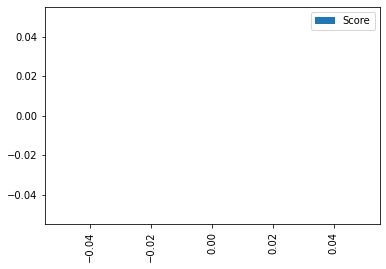

In [160]:
mw_df.plot.bar(x='Features',y='Score')
plt.savefig("/content/drive/MyDrive/d2k/1_MannWhitney.pdf", format="pdf", bbox_inches="tight")
plt.show()

> **CHI SQUARE TEST**

In [162]:
df3=df2
df3[df3<0]=99 #Chi square doesn't recognize negative values- missing values aka -9 are resubstituted as 99

In [163]:
X = df3.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df3['P1_PT_TYPE']
chi=chi2(X,y)   #returns f score and p value 

#Chi Test Score
chi_score=chi[1].tolist()

# #Chi Test Features
chi_features=list(X)

chi_dict = {'Features':chi_features,'Score':chi_score}
chi_df=pd.DataFrame(chi_dict)
chi_df=chi_df.sort_values(by='Score', ascending=False)
chi_df=chi_df.head(30)

chi_df

,Features,Score
54,X1_OBESE_IS,4.443925e-01
47,D1_HYCEPH,1.122385e-01
6,A5_AUTOIMM,7.219348e-02
20,A5_IBD,1.764452e-02
12,A5_CVANGIO,2.944833e-04
48,D1_NEOP,3.866476e-05
25,A5_THYROID,6.670810e-06
14,A5_CVCHF,5.534616e-06
19,A5_HYPERTEN,3.973540e-07
43,D1_BRNINJ,1.089274e-07


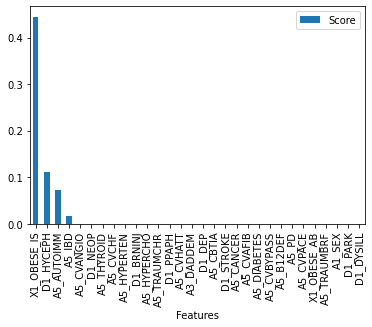

In [164]:
chi_df.plot.bar(x='Features',y='Score')
plt.savefig("/content/drive/MyDrive/d2k/2_ChiSquare.pdf", format="pdf", bbox_inches="tight")
plt.show()

> **MUTUAL INFORMATION TEST**

In [165]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
mi= MIC(X,y)

#Mutual Info Features
mi_cols=list(X.columns)

#Mutual Info Scores
mi_score=mi.tolist()


mi_dict = {'Features':mi_cols,'Score':mi_score}
mi_df=pd.DataFrame(mi_dict)
mi_df=mi_df.sort_values(by='Score', ascending=False)
mi_df=mi_df.head(30)


mi_df

,Features,Score
37,B5_APA,0.089421
33,B5_AGIT,0.085588
0,AGE,0.078536
39,B5_IRR,0.065524
35,B5_ANX,0.064700
40,B5_MOT,0.057824
38,B5_DISN,0.056522
41,B5_NITE,0.049776
42,B5_APP,0.045858
31,B5_DEL,0.043669


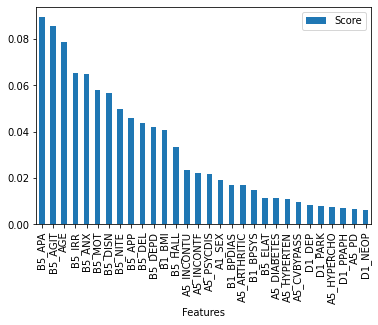

In [166]:
mi_df.plot.bar(x='Features',y='Score')
plt.savefig("/content/drive/MyDrive/d2k/3_MutualInfo.pdf", format="pdf", bbox_inches="tight")
plt.show()

*EMBEDDED FEATURE SELECTION*

> **RANDOM FOREST BASED FEATURE SELECTION**

In [167]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

#Standard Scaling
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

Xcols=list(X.columns)
X_train_std=pd.DataFrame(X_train_std, columns=Xcols)
X_test_std=pd.DataFrame(X_test_std, columns=Xcols)

#Fitting the model
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train_std, y_train.values.ravel())

#RF Score
rf_score=forest.feature_importances_.tolist()

#RF Features
rf_features=list(X.columns)

rf_dict = {'Features':rf_features,'Score':rf_score}
rf_df=pd.DataFrame(rf_dict)
rf_df=rf_df.sort_values(by='Score', ascending=False)
rf_df=rf_df.head(30)

rf_df

,Features,Score
0,AGE,0.118259
28,B1_BMI,0.106458
30,B1_BPSYS,0.086664
29,B1_BPDIAS,0.080897
37,B5_APA,0.045356
33,B5_AGIT,0.032663
39,B5_IRR,0.030180
35,B5_ANX,0.029025
40,B5_MOT,0.026827
18,A5_HYPERCHO,0.026294


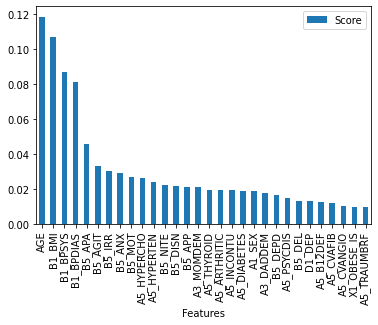

In [168]:
rf_df.plot.bar(x='Features',y='Score')
plt.savefig("/content/drive/MyDrive/d2k/4_RandomForest.pdf", format="pdf", bbox_inches="tight")
plt.show()

*WRAPPER BASED FEATURE SELECTION*

**RECURSIVE FEATURE SELECTION**
Using Random Forest

In [169]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=30)
rfs=rfe.fit(X, y)

#RFS Features
rfs_features= list(X.columns)

#RFS Scores
rfs_score= rfs.support_.tolist()

rfs_dict = {'Features':rfs_features,'Score':rfs_score}


In [170]:
rfs_df= pd.DataFrame.from_dict(rfs_dict)
rfs_df=rfs_df.loc[rfs_df['Score'] == True]
rfs_df

,Features,Score
0,AGE,True
1,A1_SEX,True
2,A3_DADDEM,True
3,A3_MOMDEM,True
5,A5_ARTHRITIC,True
7,A5_B12DEF,True
8,A5_CANCER,True
11,A5_CVAFIB,True
12,A5_CVANGIO,True
17,A5_DIABETES,True


**RECURSIVE FEATURE SELECTION**
Using Decision Tree

In [171]:
rfe2 = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=30)
rfs2 = rfe2.fit(X, y)

#RFS Features
rfs2_features= list(X.columns)

#RFS Scores
rfs2_score= rfs2.support_.tolist()

rfs2_dict = {'Features':rfs2_features,'Score':rfs2_score}

In [172]:
rfs2_df= pd.DataFrame.from_dict(rfs2_dict)
rfs2_df=rfs2_df.loc[rfs2_df['Score'] == True]
rfs2_df

,Features,Score
0,AGE,True
1,A1_SEX,True
2,A3_DADDEM,True
3,A3_MOMDEM,True
5,A5_ARTHRITIC,True
7,A5_B12DEF,True
8,A5_CANCER,True
11,A5_CVAFIB,True
12,A5_CVANGIO,True
17,A5_DIABETES,True


> **FORWARD FEATURES SELECTION**: Using Decision Tree Classifier



In [173]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

model = DecisionTreeClassifier()
ff1 = sfs(model, k_features=30, forward=True, verbose=2, scoring='accuracy')
ff1 = ff1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.1s finished

[2022-10-27 04:35:13] Features: 1/30 -- score: 0.58676219720232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.3s finished

[2022-10-27 04:35:14] Features: 2/30 -- score: 0.626202661207779[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    1.4s finished

[2022-10-27 04:35:15] Features: 3/30 -- score: 0.6400545888775163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [174]:
ff1.subsets_

{1: {'feature_idx': (37,),
  'cv_scores': array([0.58000682, 0.58341863, 0.59808939, 0.59945411, 0.57284203]),
  'avg_score': 0.58676219720232,
  'feature_names': ('B5_APA',)},
 2: {'feature_idx': (33, 37),
  'cv_scores': array([0.61310133, 0.64448994, 0.63834869, 0.62299556, 0.61207779]),
  'avg_score': 0.626202661207779,
  'feature_names': ('B5_AGIT', 'B5_APA')},
 3: {'feature_idx': (33, 37, 40),
  'cv_scores': array([0.62811327, 0.66325486, 0.64790174, 0.63254862, 0.62845445]),
  'avg_score': 0.6400545888775163,
  'feature_names': ('B5_AGIT', 'B5_APA', 'B5_MOT')},
 4: {'feature_idx': (33, 37, 38, 40),
  'cv_scores': array([0.63903105, 0.67621972, 0.65540771, 0.63425452, 0.62743091]),
  'avg_score': 0.6464687819856704,
  'feature_names': ('B5_AGIT', 'B5_APA', 'B5_DISN', 'B5_MOT')},
 5: {'feature_idx': (31, 33, 37, 38, 40),
  'cv_scores': array([0.64448994, 0.67997271, 0.65677243, 0.63903105, 0.63596042]),
  'avg_score': 0.6512453087683385,
  'feature_names': ('B5_DEL', 'B5_AGIT', 'B5

In [175]:
ff1_dict=ff1.get_metric_dict(confidence_interval=0.8)
ff1_df = pd.DataFrame.from_dict(ff1_dict).T
ff1_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(37,)","[0.5800068236096895, 0.5834186284544524, 0.598...",0.586762,"(B5_APA,)",0.007669,0.010392,0.005196
2,"(33, 37)","[0.6131013306038895, 0.644489935175708, 0.6383...",0.626203,"(B5_AGIT, B5_APA)",0.009697,0.013141,0.00657
3,"(33, 37, 40)","[0.6281132719208461, 0.6632548618219037, 0.647...",0.640055,"(B5_AGIT, B5_APA, B5_MOT)",0.010082,0.013663,0.006831
4,"(33, 37, 38, 40)","[0.6390310474240873, 0.6762197202320027, 0.655...",0.646469,"(B5_AGIT, B5_APA, B5_DISN, B5_MOT)",0.012917,0.017504,0.008752
5,"(31, 33, 37, 38, 40)","[0.644489935175708, 0.6799727055612419, 0.6567...",0.651245,"(B5_DEL, B5_AGIT, B5_APA, B5_DISN, B5_MOT)",0.011827,0.016027,0.008013
6,"(31, 33, 37, 38, 40, 46)","[0.6441487546912317, 0.6809962470146708, 0.658...",0.654589,"(B5_DEL, B5_AGIT, B5_APA, B5_DISN, B5_MOT, D1_...",0.010582,0.01434,0.00717
7,"(31, 32, 33, 37, 38, 40, 46)","[0.6465370180825657, 0.6833845104060048, 0.657...",0.656295,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010438,0.014144,0.007072
8,"(31, 32, 33, 37, 38, 40, 46, 48)","[0.6475605595359946, 0.6840668713749574, 0.657...",0.656636,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010531,0.01427,0.007135
9,"(31, 32, 33, 37, 38, 40, 46, 48, 52)","[0.6475605595359946, 0.6840668713749574, 0.656...",0.656704,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010402,0.014096,0.007048
10,"(27, 31, 32, 33, 37, 38, 40, 46, 48, 52)","[0.6475605595359946, 0.6840668713749574, 0.656...",0.656704,"(A5_TRAUMCHR, B5_DEL, B5_HALL, B5_AGIT, B5_APA...",0.010402,0.014096,0.007048


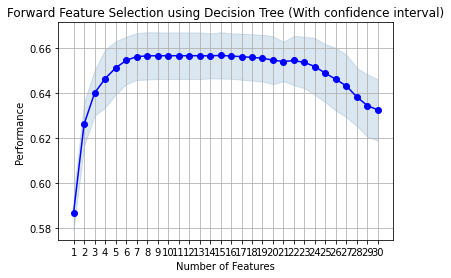

In [176]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1=plot_sfs(ff1_dict, kind='ci')
plt.title('Forward Feature Selection using Decision Tree (With confidence interval)')
plt.savefig("/content/drive/MyDrive/d2k/5_ForwardFeature.pdf", format="pdf", bbox_inches="tight")
plt.grid()
plt.show()

In [177]:
ff1_features=list(ff1_df['feature_names'][30])
ff1_features

['A5_ARTHRITIC',
 'A5_AUTOIMM',
 'A5_CANCER',
 'A5_CBSTROKE',
 'A5_CVBYPASS',
 'A5_CVCHF',
 'A5_CVHATT',
 'A5_CVPACE',
 'A5_IBD',
 'A5_PD',
 'A5_TRAUMBRF',
 'A5_TRAUMCHR',
 'B5_DEL',
 'B5_HALL',
 'B5_AGIT',
 'B5_ELAT',
 'B5_APA',
 'B5_DISN',
 'B5_IRR',
 'B5_MOT',
 'B5_NITE',
 'D1_BRNINJ',
 'D1_CORT',
 'D1_DYSILL',
 'D1_HYCEPH',
 'D1_NEOP',
 'D1_PARK',
 'D1_PPAPH',
 'D1_STROKE',
 'D1_VASC']

> **FORWARDS FEATURE SELECTION**: Using Random Forest

In [178]:
X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
y = df2['P1_PT_TYPE']

model = RandomForestClassifier()
ff2 = sfs(model, k_features=30, forward=True, verbose=2, scoring='accuracy')
ff2 = ff2.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  1.6min finished

[2022-10-27 04:38:13] Features: 1/30 -- score: 0.58676219720232[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.7min finished

[2022-10-27 04:39:57] Features: 2/30 -- score: 0.626202661207779[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:  1.6min finished

[2022-10-27 04:41:34] Features: 3/30 -- score: 0.6400545888775163[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [179]:
ff2_dict=ff2.get_metric_dict(confidence_interval=0.9)
ff2_df = pd.DataFrame.from_dict(ff2_dict).T
ff2_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(37,)","[0.5800068236096895, 0.5834186284544524, 0.598...",0.586762,"(B5_APA,)",0.007669,0.010392,0.005196
2,"(33, 37)","[0.6131013306038895, 0.644489935175708, 0.6383...",0.626203,"(B5_AGIT, B5_APA)",0.009697,0.013141,0.00657
3,"(33, 37, 40)","[0.6281132719208461, 0.6632548618219037, 0.647...",0.640055,"(B5_AGIT, B5_APA, B5_MOT)",0.010082,0.013663,0.006831
4,"(33, 37, 38, 40)","[0.6390310474240873, 0.6762197202320027, 0.655...",0.646469,"(B5_AGIT, B5_APA, B5_DISN, B5_MOT)",0.012917,0.017504,0.008752
5,"(31, 33, 37, 38, 40)","[0.644489935175708, 0.6799727055612419, 0.6567...",0.651245,"(B5_DEL, B5_AGIT, B5_APA, B5_DISN, B5_MOT)",0.011827,0.016027,0.008013
6,"(31, 33, 37, 38, 40, 46)","[0.6441487546912317, 0.6809962470146708, 0.658...",0.654521,"(B5_DEL, B5_AGIT, B5_APA, B5_DISN, B5_MOT, D1_...",0.010628,0.014402,0.007201
7,"(31, 32, 33, 37, 38, 40, 46)","[0.6465370180825657, 0.6833845104060048, 0.657...",0.656158,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010516,0.01425,0.007125
8,"(31, 32, 33, 37, 38, 40, 46, 48)","[0.6475605595359946, 0.6840668713749574, 0.657...",0.656568,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010601,0.014366,0.007183
9,"(31, 32, 33, 37, 38, 40, 46, 47, 48)","[0.6475605595359946, 0.6840668713749574, 0.657...",0.656568,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010601,0.014366,0.007183
10,"(31, 32, 33, 37, 38, 40, 46, 47, 48, 49)","[0.6475605595359946, 0.6837256908904811, 0.657...",0.656568,"(B5_DEL, B5_HALL, B5_AGIT, B5_APA, B5_DISN, B5...",0.010463,0.014179,0.007089


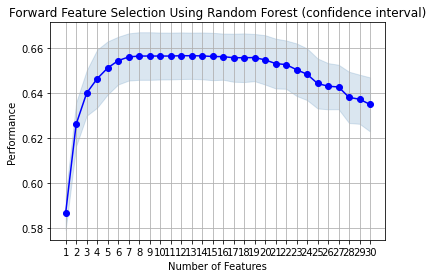

In [180]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig2=plot_sfs(ff2_dict, kind='ci')
plt.title('Forward Feature Selection Using Random Forest (confidence interval)')
plt.grid()
plt.show()

In [191]:
ff2_features=list(ff2_df['feature_names'][30])
ff2_features

['A3_MOMDEM',
 'A5_ALCOHOL',
 'A5_AUTOIMM',
 'A5_B12DEF',
 'A5_CANCER',
 'A5_CBSTROKE',
 'A5_CVCHF',
 'A5_CVPACE',
 'A5_IBD',
 'A5_INCONTF',
 'A5_PD',
 'A5_TRAUMCHR',
 'B5_DEL',
 'B5_HALL',
 'B5_AGIT',
 'B5_ANX',
 'B5_ELAT',
 'B5_APA',
 'B5_DISN',
 'B5_MOT',
 'D1_BRNINJ',
 'D1_CORT',
 'D1_DYSILL',
 'D1_HYCEPH',
 'D1_NEOP',
 'D1_PARK',
 'D1_PPAPH',
 'D1_STROKE',
 'D1_VASC',
 'X1_OBESE_IS']

> **BACKWARDS FEATURES ELIMINATION**: 
Using Log Reg

In [182]:
# X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
# y = df2['P1_PT_TYPE']

# bf1 = sfs(LogisticRegression(), k_features=30, forward=False, verbose=1, scoring='accuracy')
# bf1 = bf1.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

In [183]:
# bf1_dict=bf1.get_metric_dict(confidence_interval=0.8)
# bf1_df = pd.DataFrame.from_dict(bf1_dict).T
# bf1_df

AttributeError: ignored

In [ ]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# fig1=plot_sfs(bf1_dict, kind='ci')
# plt.title('Backward Feature Selection using Log Regression (With confidence interval)')
# plt.grid()
# plt.show()

In [ ]:
# bf1_features=list(bf1_df['feature_names'][30])
# bf1_features

> **BACKWARDS FEATURES ELIMINATION**: Using Decision Tree Classifer

In [ ]:
# X = df2.drop(['P1_PT_TYPE'], axis=1, inplace = False)
# y = df2['P1_PT_TYPE']

# model = DecisionTreeClassifier()
# bf2 = sfs(model, k_features=30, forward=False, verbose=1, scoring='accuracy')
# bf2 = bf2.fit(X,y)

In [ ]:
# bf2_dict=bf2.get_metric_dict(confidence_interval=0.8)
# bf2_df = pd.DataFrame.from_dict(bf2_dict).T
# bf2_df

In [ ]:
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# fig1=plot_sfs(bf2_dict, kind='ci')
# plt.title('Backward Feature Selection using Random Forest Classifier (With confidence interval)')
# plt.grid()
# plt.show()

In [ ]:
# bf2_features=list(bf2_df['feature_names'][30])
# bf2_features

*OTHER METHODS*


> **BORUTA** Using Random Forest, provides a rank

In [184]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

# train Boruta
# N.B.: X and y must be numpy arrays
feat_selector.fit(np.array(X), np.array(y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print(X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])


Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	55
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	44
Iteration: 	9 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	44


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	10
Tentative: 	1
Rejected: 	44

------Support and Ranking for each feature------
AGE  - Ranking:  1
A5_ARTHRITIC  - Ranking:  1
A5_DIABETES  - Ranking:  1
B1_BMI  - Ranking:  1
B5_DEL  - Ranking:  1
B5_APA  - Ranking:  1
B5_DISN  - Ranking:  1
B5_MOT  - Ranking:  1
D1_DYSILL  - Ranking:  1
X1_OBESE_AB  - Ranking:  1


In [185]:
boruta_features=[]
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        boruta_features.append(X.columns[i])
boruta_features

['AGE',
 'A5_ARTHRITIC',
 'A5_DIABETES',
 'B1_BMI',
 'B5_DEL',
 'B5_APA',
 'B5_DISN',
 'B5_MOT',
 'D1_DYSILL',
 'X1_OBESE_AB']

> **KRUSKAL WALLIS TEST**

In [190]:
from pyparsing import printables

kruskal_features = []
kruskal_scores = []

for col in X.columns:
    feature = X[col]

    result = stats.kruskal(list(feature), list(y))
    # reject null hypothesis if p <= p_value, else fail to reject null hypothesis and accept the column
    if result.pvalue > 0:
        kruskal_features.append(col)
        kruskal_scores.append(result.pvalue)
print(kruskal_features, kruskal_scores)

[] []


In [187]:
# kruskal_features= pd.DataFrame(kruskal_features)
# kruskal_scores= pd.DataFrame(kruskal_scores)
# kruskal_df= pd.concat([kruskal_features, kruskal_scores], axis=1)
# kruskal_df.columns = ['Features', 'Score']
# kruskal_df

ValueError: ignored

In [ ]:
# # kruskal_df.plot.bar(x='Features',y='Score')
# plt.savefig("/content/drive/MyDrive/d2k/6_Kruskal.pdf", format="pdf", bbox_inches="tight")
# plt.show()

>**_COMBINING ALL THE FEATURES FROM ALL THE FEATURE IMPORTANCE METHODS_**

In [192]:
features=[]
features=list(mi_df['Features'])+list(chi_df['Features'])+list(rf_df['Features'])+list(rfs_df['Features'])+list(rfs2_df['Features'])+ff1_features+ff2_features+boruta_features
features=pd.DataFrame(features).reset_index(drop=True)
features.columns = ['Features']
counts = features['Features'].value_counts().to_frame().reset_index()
counts.columns=['Features','Frequency']
counts=counts.head(28)
x=list(counts['Features'])
x


['B5_APA',
 'B5_DISN',
 'B5_DEL',
 'B5_MOT',
 'A5_DIABETES',
 'A5_ARTHRITIC',
 'B5_AGIT',
 'B5_NITE',
 'AGE',
 'B5_ANX',
 'A5_HYPERCHO',
 'B1_BMI',
 'A5_B12DEF',
 'D1_DEP',
 'A5_CANCER',
 'A1_SEX',
 'B5_IRR',
 'A5_HYPERTEN',
 'D1_NEOP',
 'X1_OBESE_IS',
 'A3_DADDEM',
 'A5_CVANGIO',
 'A5_THYROID',
 'A3_MOMDEM',
 'A5_PD',
 'A5_TRAUMBRF',
 'D1_DYSILL',
 'A5_CVAFIB']

**PICKLING**

Pickling is done in order to store the results of the feature selection. This circumvents the necessity to rerun feature selection repeatedly. The pickled features can be unpickled for modeling purpose.

In [193]:
import pickle

with open("/content/drive/MyDrive/d2k/features2", "wb") as fp:
  pickle.dump(x, fp)
X_feat = pickle.load(open("/content/drive/MyDrive/d2k/features2", "rb" ))
X_feat

['B5_APA',
 'B5_DISN',
 'B5_DEL',
 'B5_MOT',
 'A5_DIABETES',
 'A5_ARTHRITIC',
 'B5_AGIT',
 'B5_NITE',
 'AGE',
 'B5_ANX',
 'A5_HYPERCHO',
 'B1_BMI',
 'A5_B12DEF',
 'D1_DEP',
 'A5_CANCER',
 'A1_SEX',
 'B5_IRR',
 'A5_HYPERTEN',
 'D1_NEOP',
 'X1_OBESE_IS',
 'A3_DADDEM',
 'A5_CVANGIO',
 'A5_THYROID',
 'A3_MOMDEM',
 'A5_PD',
 'A5_TRAUMBRF',
 'D1_DYSILL',
 'A5_CVAFIB']